
### Classification :

* In machine learning and statistics, classification is a supervised learning approach in which the computer program learns from the data input given to it and then uses this learning to classify new observation. This data set may simply be bi-class or  may be multi-class.If we have to classify between two target varriables then it will be considered as bi-class classification else we have multiple target varriables to predict then it will be consodered as multi-class classification. In our Assignment we are dealing with a Multi class Classification.

* A classification model attempts to draw some conclusion from observed values. Given one or more inputs a classification model will try to predict the value of one or more outcomes.

* From Multiple Packages like  scikit-learn ,PyTorch,Keras,TensorFlow and Tools like Weka, scikit-learn is the suitable library to implement supervised learning which includes Clssification problems.Hence In our assignment we will be using scikit-learn.

#### Scikit-Learn
* Scikit-learn is a free software machine learning library for the Python programming language.This is a popular ML library, built on NumPy, SciPy and matplotlib.It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
* The main advantage of this solution is its accessibility and simplicity – it’s easy to use even for beginners – and a great choice for simpler data analysis tasks.The reason why we will be using Scikit Learn for this classification problem.

In [1]:
# Starting with importing all the requisite libraries we will use in our Classification Model
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

###### Data preparation
* After importing all the requisite Libraries, we are creating a dataset by importing the given hazelnuts.txt file.Since the data inside the file is in Pivoted format we need to Transpose the data to suitably fit in our model.
* Afer importing we can label the columns and segregate the same in Feature data(dependant variables) an label data(target varriable). We are removing the sample_id from the feature data as it's not contributing in predicting the correct hazelnut type.

In [28]:
data = pd.read_csv('hazelnuts.txt',sep='\t', header=None)    # Reading the given Dataset.
#Transposing the data as the given data is in pivoted format.As given in the 
data_T = data.T
data_T.columns = ['sample_id','length', 'width','thickness','surface_area','mass','compactness',
                  'hardness','shell_top_radius','water_content','carbohydrate_content','variety']

labelencoder = LabelEncoder()
data_T['variety'] = labelencoder.fit_transform(data_T['variety'])


In [6]:
data_T.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 12 columns):
sample_id               201 non-null object
length                  201 non-null object
width                   201 non-null object
thickness               201 non-null object
surface_area            201 non-null object
mass                    201 non-null object
compactness             201 non-null object
hardness                201 non-null object
shell_top_radius        201 non-null object
water_content           201 non-null object
carbohydrate_content    201 non-null object
variety                 201 non-null int32
dtypes: int32(1), object(11)
memory usage: 19.6+ KB


In [8]:
data_T.count().sort_values()

sample_id               201
length                  201
width                   201
thickness               201
surface_area            201
mass                    201
compactness             201
hardness                201
shell_top_radius        201
water_content           201
carbohydrate_content    201
variety                 201
dtype: int64

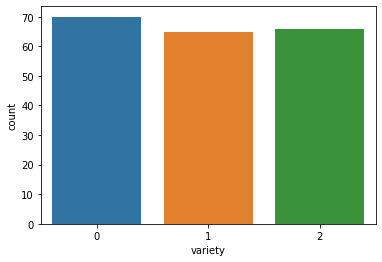

In [18]:
sns.countplot(data_T['variety'])
plt.show()

In [29]:
lable_data = data_T['variety'].values  #Segregating the Feature data and Target data
feature_data = data_T.drop(['variety','sample_id'],axis=1).values

**1.k-nearest neighbors Classifier**<br />:
We will be 1st using **k-nearest neighbors (KNN)** algorithm to build our classification model.
* The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
* in KNN algorithm an object is classified by a plurality vote of its neighbors. For example if we put an object to be classified and we are usning K=3 in the process, then the object will be classified according to the class of maximum number of neighbor objects out of 3.  
* k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification.

We can have a better understanding on KNN algorithm by reffering following links.https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm, https://medium.com/datadriveninvestor/k-nearest-neighbors-knn-7b4bd0128da7

In [13]:
knn = KNeighborsClassifier(7)
cvpredict_knn = cross_val_predict(knn,feature_data,lable_data,cv = 10)
cm_knn = confusion_matrix(lable_data, cvpredict_knn)
df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in ('c_americana','c_avellana','c_cornuta')],
                         columns = [i for i in ('c_americana','c_avellana','c_cornuta')])

Text(14.093749999999996, 0.5, 'Actuals')

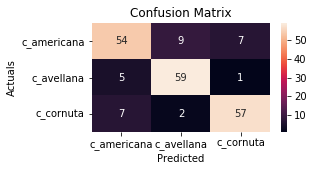

In [15]:
plt.figure(figsize = (4,2))
sns.heatmap(df_cm_knn, annot=True)
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actuals")

In [17]:
print(classification_report(lable_data, cvpredict_knn))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        70
           1       0.84      0.91      0.87        65
           2       0.88      0.86      0.87        66

    accuracy                           0.85       201
   macro avg       0.85      0.85      0.85       201
weighted avg       0.85      0.85      0.84       201



As from classification report we can see the accuracy in the KNN model is 85%. We can also use Score() function in scikit learn to calculate the accuracy. We can check the prediction details clearly in the confusion matrix above.<br /> 

**2.The Random Forest Classifier**

The Next Classification Mechanism that we will use is **The Random Forest Classifier**.
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. 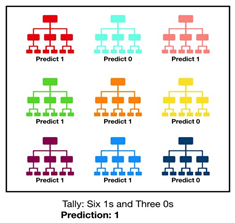

To Start with Random forest classifier 
* We need features that have at least some predictive power
* The trees of the forest and more importantly their predictions need to be uncorrelated
    * Random forest ensure that the behavior of each individual tree is not too correlated with the behavior of any of the     other trees in the model with couple of methods (Bagging and Feature Randomness).<br /> 
    **Bagging** :  Random forest takes each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.<br /> 
    **Feature Randomness** : Each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

We can have better understanding about The Random Forest Classifier by referring following links.
https://towardsdatascience.com/understanding-random-forest-58381e0602d2 , https://en.wikipedia.org/wiki/Random_forest


In [31]:
rnf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
cvpredict = cross_val_predict(rnf,feature_data,lable_data,cv = 10)

In [32]:
print(classification_report(lable_data, cvpredict))

              precision    recall  f1-score   support

 c_americana       0.86      0.81      0.84        70
  c_avellana       0.81      0.88      0.84        65
   c_cornuta       0.95      0.94      0.95        66

    accuracy                           0.88       201
   macro avg       0.88      0.88      0.88       201
weighted avg       0.88      0.88      0.88       201



In [40]:
accuracy_rnf = cross_val_score(rnf,feature_data,lable_data,cv = 10)
print(np.mean(accuracy_rnf))

0.8757017543859649


Text(32.09375, 0.5, 'Actuals')

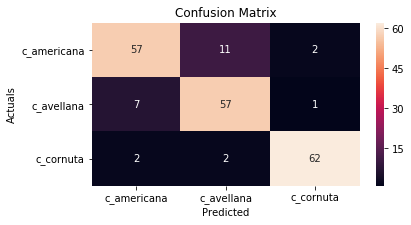

In [44]:
cm_rnf = confusion_matrix(lable_data, cvpredict)
df_cm_rnf = pd.DataFrame(cm_rnf, index = [i for i in ('c_americana','c_avellana','c_cornuta')],
                         columns = [i for i in ('c_americana','c_avellana','c_cornuta')])
plt.figure(figsize = (6,3))
sn.heatmap(df_cm_rnf, annot=True)
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actuals")

As from classification report we can see the accuracy in the Random Forest Model model is 88%.We can chek the prediction details clearly in the confusion matrix above.
We have also used cross_val_score() function in scikit learn to calculate the accuracy of thr model.


#### Validation and Result : 
* In both our model we have done 10 cross validation.Where we are Splitting the data into 10 folds and Iteratively fiitting the data with 9 folds and testing with the other fold data.After that we are taking the mean of the accruracies for each prediction for 10 different folds.
* If we compare the results the accuracy of Random forest classifier has performed better.Random Forest algorithm can always handle high dimensional spaces and as well as any number of training examples.Where as in KNN the acuracy depends o the K value we choose.The computation time is also very much as we need to compute distance of each query instance to all training samples.
